In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# Independent non-homogeneous poisson
# Generation: https://en.wikipedia.org/wiki/Poisson_point_process#Simulation
# 1. Generate num_points from pois(lambda * win_length)
# 2. Place points in each window uniformly randomly

def independent_non_homogeneous_poisson(lambdas, win_length):
    t = np.zeros(len(lambdas) * win_length)
    for i, lambd in enumerate(lambdas):
        num_points = np.random.poisson(lambd * win_length)

        if num_points >= win_length:
            t[i * win_length : (i + 1) * win_length] = 1
            continue

        random_inds = np.random.choice(a = np.arange(win_length), size = num_points, replace = False)
        spikes = np.zeros(win_length)
        spikes[random_inds] = 1
        t[i * win_length : (i + 1) * win_length] = spikes
    return t


In [42]:
independent_non_homogeneous_poisson(np.array([0.2, 0.5, 0.8]), 4)

array([1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.])

In [55]:
np.random.seed(123)
independent_non_homogeneous_poisson(np.array([1, 1, 1]), 1)

array([1., 0., 1.])

In [49]:
# For window of size 1, it is equivalent to
def independent_non_homogeneous_poisson_for_window_one(lambdas):
    t = np.zeros(len(lambdas))
    for i, lambd in enumerate(lambdas):
        num_points = np.random.poisson(lambd)
        if num_points > 0: t[i] = 1
    return t

In [54]:
np.random.seed(123)
independent_non_homogeneous_poisson_for_window_one(np.array([1, 1, 1]))

array([1., 0., 1.])

In [57]:
# Check equivalence
error = []

for exp_num in range(1000):
    np.random.seed(123 + exp_num)
    t0 = independent_non_homogeneous_poisson(np.arange(0.1, 2.1, 0.1), 1)
    np.random.seed(123 + exp_num)
    t1 = independent_non_homogeneous_poisson_for_window_one(np.arange(0.1, 2.1, 0.1))
    error.append(np.sum(np.abs(t0 - t1)))

np.mean(error)

0.0

In [70]:
# Dependent non-homogeneous poisson
lambda_0 = 1
lambdas = [lambda_0]

for i in range(1, 1000):
    lambdas.append(lambdas[i - 1] * 0.99)

np.mean(lambdas)

0.09999568287525887

In [71]:
train = independent_non_homogeneous_poisson_for_window_one(lambdas)
np.mean(train)

0.09

In [90]:
# Modulation
from scipy.signal import lfilter, welch

def generate_pink_noise(num_obs):
    white_noise = np.random.normal(1, 0.5, num_obs + 2000)

    A = [1, -2.494956002, 2.017265875, -0.522189400]
    B = [0.049922035, -0.095993537, 0.050612699, -0.004408786]

    pink_noise = lfilter(B, A, white_noise)[2000:]
    pink_noise = (pink_noise - np.min(pink_noise)) / (np.max(pink_noise) - np.min(pink_noise))
    return pink_noise

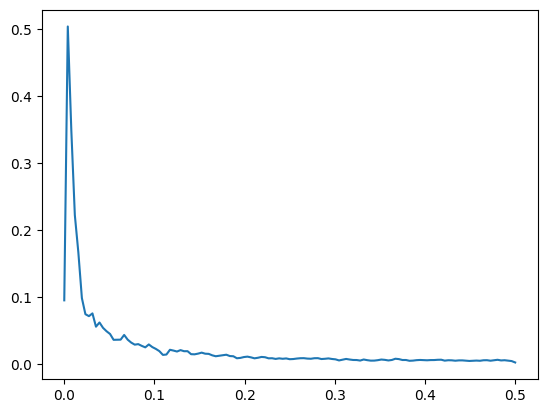

In [91]:
w, powers = welch(generate_pink_noise(10000))
plt.plot(w, powers)

In [100]:
pink_noise = generate_pink_noise(1000)
np.min(pink_noise), np.max(pink_noise)

(0.0, 1.0)

In [105]:
def sinusoidal_modulation(trace):
    t = np.linspace(0, 1, len(trace))
    return trace + trace * np.sin(2 * np.pi * t)

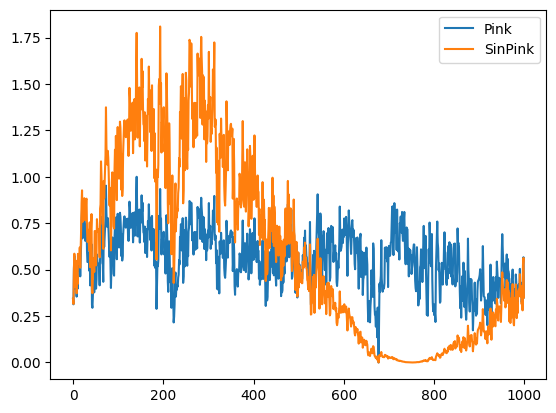

In [107]:
np.random.seed(123)
pink_noise = generate_pink_noise(1000)
sin_pink_noise = sinusoidal_modulation(pink_noise)
plt.plot(pink_noise, label = "Pink")
plt.plot(sin_pink_noise, label = "SinPink")
plt.legend()

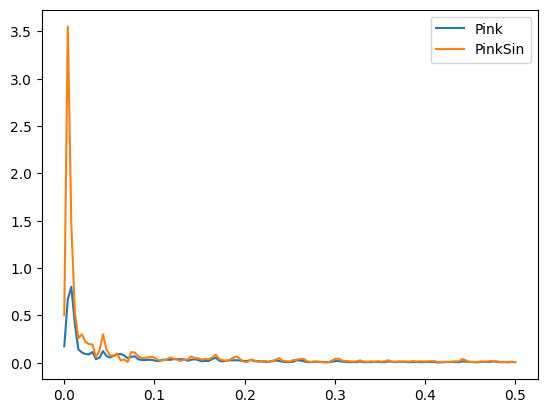

In [108]:
np.random.seed(123)
pink_noise = generate_pink_noise(1000)
sin_pink_noise = sinusoidal_modulation(pink_noise)

w, powers = welch(pink_noise)
plt.plot(w, powers, label = "Pink")

w, powers = welch(sin_pink_noise)
plt.plot(w, powers, label = "PinkSin")
plt.legend()

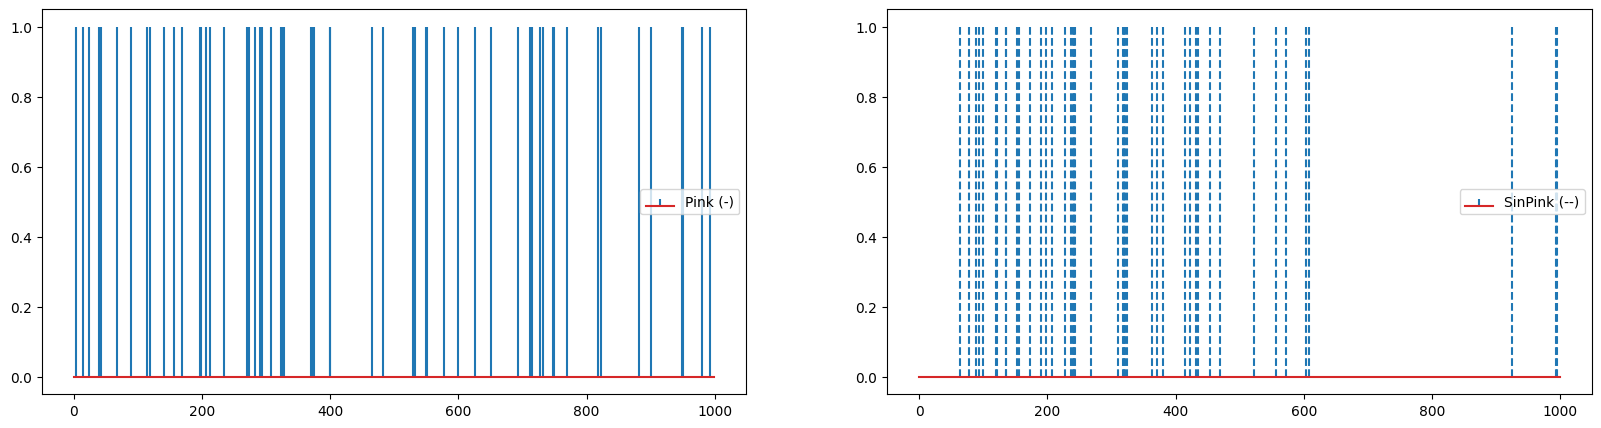

In [128]:
np.random.seed(123)
pink_noise = generate_pink_noise(1000)
sin_pink_noise = sinusoidal_modulation(pink_noise)

pink_spikes = independent_non_homogeneous_poisson_for_window_one(pink_noise / 10)
sin_spikes = independent_non_homogeneous_poisson_for_window_one(sin_pink_noise / 10)

fig, ax = plt.subplots(1, 2, figsize = (20, 5))
ax[0].stem(pink_spikes, markerfmt = ' ', label = "Pink (-)")
ax[1].stem(sin_spikes, markerfmt = ' ', label = "SinPink (--)", linefmt = '--')

ax[0].legend()
ax[1].legend()